In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Load the data and create a copy:

In [3]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
copy_df = customer_df.copy()

copy_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Clean column names:

In [5]:
cols = []
for x in copy_df.columns:
    cols.append(x.lower().replace(' ','_'))
    
copy_df.columns = cols

copy_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## Swap index with customer column:

In [6]:
copy_df.drop(['customer'], axis=1, inplace=True)

copy_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Separating data by numerical/categorical:

In [7]:
numerical = copy_df.select_dtypes(np.number)

#numerical.head()

numerical.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [8]:
categorical = copy_df.select_dtypes(object)

#categorical.head()

categorical.dtypes

state                object
response             object
coverage             object
education            object
effective_to_date    object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

## Removing outliers:

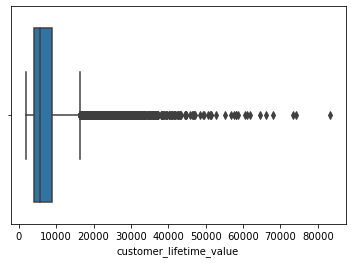

In [9]:
sns.boxplot(data = numerical, x = 'customer_lifetime_value')
plt.show()

In [10]:
for x in ['customer_lifetime_value']:
    mean = numerical['customer_lifetime_value'].mean
    q75,q25 = np.percentile(copy_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    numerical.loc[copy_df[x] < min,x] = mean
    numerical.loc[copy_df[x] > max,x] = mean

In [11]:
for x in ['income']:
    mean = copy_df['income'].mean
    q75,q25 = np.percentile(copy_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    copy_df.loc[copy_df[x] < min,x] = mean
    copy_df.loc[copy_df[x] > max,x] = mean

<function matplotlib.pyplot.show(close=None, block=None)>

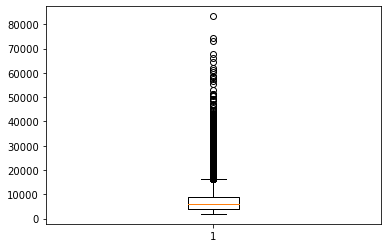

In [12]:
plt.boxplot(copy_df['customer_lifetime_value'])

plt.show

In [13]:
copy_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [14]:
copy_df.drop(['number_of_open_complaints'], axis=1)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,18,89,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,14,28,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,9,37,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,34,3,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Dropping NaN values in numerical.

In [15]:
copy_df = copy_df.dropna()

## Adjusting class imbalance:

In [16]:
for col in categorical:
    display(categorical[col].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     149
1/1/11     148
2/21/11    148
1/24/11    147
1/9/11     146
1/30/11    145
1/13/11    145
2/6/11     144
1/6/11     143
2/23/11    143
1/16/11    142
2/16/11    139
2/13/11    139
2/24/11    139
2/9/11     137
2/17/11    136
1/22/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: effective_to_date, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [17]:
copy_df['state'] = copy_df['state'].replace({'Arizona': 'Other State',
                                                           'Nevada':'Other State', 'Washington':'Other State'})

In [18]:
copy_df['education'] = copy_df['education'].replace({'Master':'Postgrad','Doctor':'Postgrad'})

In [19]:
copy_df['employmentstatus'] = copy_df['employmentstatus'].replace({'Medical Leave':'Not looking for work',
                                                                                 'Disabled':'Not looking for work',
                                                                                 'Retired':'Not looking for work'})

In [20]:
copy_df['marital_status'] = copy_df['marital_status'].replace({'Divorced':'Single'})

In [21]:
copy_df['vehicle_class'] = copy_df['vehicle_class'].replace({'Sports Car':'High end car','Luxury SUV':'High end car', 
                                                                          'Luxury Car': 'High end car'})

In [22]:
copy_df['renew_offer_type'] = copy_df['renew_offer_type'].replace({'Offer1': 1,'Offer2': 2,'Offer3': 3,'Offer4': 4})

In [23]:
copy_df['effective_to_date'] = pd.to_datetime(copy_df['effective_to_date'])

## Dropping the policy column because it's giving redundant data that we can get from policy_type:

In [24]:
copy_df.drop(['policy'], axis=1)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Other State,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,32,5,0,1,Corporate Auto,1,Agent,384.811147,Two-Door Car,Medsize
1,Other State,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,13,42,0,8,Personal Auto,3,Agent,1131.464935,Four-Door Car,Medsize
2,Other State,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,18,38,0,2,Personal Auto,1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate Auto,1,Call Center,529.881344,SUV,Medsize
4,Other State,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,12,44,0,1,Personal Auto,1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,18,89,0,2,Personal Auto,2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,14,28,0,1,Corporate Auto,1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,9,37,3,2,Corporate Auto,1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,34,3,0,3,Personal Auto,3,Branch,691.200000,Four-Door Car,Large


## Convert effective_to_date into day-month format:

In [25]:
copy_df['day'] = pd.to_datetime(copy_df['effective_to_date']).dt.day
copy_df['month'] = pd.to_datetime(copy_df['effective_to_date']).dt.month
copy_df['year'] = pd.to_datetime(copy_df['effective_to_date']).dt.year

copy_df.head()

copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   object        
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premium_a

## X & y split:

In [25]:
y = copy_df['total_claim_amount']

X = copy_df.drop(['total_claim_amount'], axis=1)

In [26]:
X.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,month,year
0,Other State,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,1,Corporate Auto,Corporate L3,1,Agent,Two-Door Car,Medsize,24,2,2011
1,Other State,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,8,Personal Auto,Personal L3,3,Agent,Four-Door Car,Medsize,31,1,2011
2,Other State,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,2,Personal Auto,Personal L3,1,Agent,Two-Door Car,Medsize,19,2,2011
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,7,Corporate Auto,Corporate L2,1,Call Center,SUV,Medsize,20,1,2011
4,Other State,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,1,Personal Auto,Personal L1,1,Agent,Four-Door Car,Medsize,3,2,2011


In [27]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   object        
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premium_a

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 25)
(2741, 25)
(6393,)
(2741,)


## Split between numerical and categorical:

In [29]:
X_train_cont = X_train.select_dtypes(np.float64)
X_test_cont = X_test.select_dtypes(np.float64)

X_train_disc = X_train.select_dtypes(np.int64)
X_test_disc = X_test.select_dtypes(np.int64)

X_train_cat = X_train.select_dtypes(include = object)
X_test_cat = X_test.select_dtypes(include = object)


In [30]:
X_train_cont.shape

(6393, 1)

In [31]:
X_train_disc.shape

(6393, 9)

In [32]:
(X_train.select_dtypes(np.number)).shape

(6393, 10)

## Normalize the continuous variables: 

## X_train:

In [33]:
from sklearn.preprocessing import StandardScaler

Standardtransformer = StandardScaler()

Standardtransformer.fit(X_train_cont) 

X_train_continuous = Standardtransformer.transform(X_train_cont)

X_train_continuous = pd.DataFrame(X_train_continuous,columns=X_train_cont.columns, index = X_train_cont.index)

X_train_continuous.shape

(6393, 1)

## X_test:

In [34]:
X_test_continuous = Standardtransformer.transform(X_test_cont)

X_test_continuous = pd.DataFrame(X_test_continuous,columns=X_test_cont.columns, index = X_test_cont.index)

X_test_continuous.head()

,customer_lifetime_value
4793,-0.547999
2867,-0.452324
7800,-0.506268
6311,-0.335078
1697,-0.676147


In [35]:
X_train_disc.shape

(6393, 9)

## Encoding the categoricals: 

## X_train:

In [63]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder=OneHotEncoder(drop='first')
one_hot_encoder.fit(X_train_cat)

X_train_cat_enc = one_hot_encoder.transform(X_train_cat).toarray()
X_train_cat_enc = pd.DataFrame(X_train_cat_enc,index = X_train_cat.index)

X_train_cat_enc.head()

,0,1,2,3,4,5,6,7,8,9,...,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130
5970,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5988,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8525,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3268,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5924,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## X_test:

In [64]:
#one_hot_encoder.fit(X_test_cat) # I was getting errors without fitting the data again.

X_test_cat_enc = one_hot_encoder.transform(X_test_cat).toarray()
X_test_cat_enc = pd.DataFrame(X_test_cat_enc,index = X_test_cat.index)

X_test_cat_enc.head()

ValueError: Found unknown categories [40964, 24584, 32787, 73759, 32802, 32807, 32808, 41004, 73775, 32818, 24631, 49214, 16450, 41043, 57428, 24666, 41059, 32869, 90217, 41077, 73853, 32893, 73858, 57474, 41098, 57506, 65706, 98475, 82093, 98478, 32946, 32948, 65726, 65733, 32967, 73935, 65744, 24790, 49367, 32989, 41186, 24804, 16618, 65773, 90353, 57587, 24823, 24825, 65794, 24843, 82189, 16654, 33043, 24851, 33060, 41252, 65828, 74028, 16686, 74034, 41273, 49467, 74045, 41279, 57664, 16707, 16711, 49480, 65870, 24914, 74092, 24948, 41336, 49532, 74115, 24980, 49558, 24982, 33176, 98713, 74143, 65985, 25030, 82377, 41418, 33232, 33247, 82399, 33252, 74215, 25064, 98796, 82413, 49648, 41458, 41459, 57846, 16916, 57883, 16924, 25125, 33321, 49721, 74298, 66106, 41533, 25151, 49734, 16969, 16976, 49746, 25180, 66146, 16997, 82534, 66161, 90751, 33415, 90760, 25226, 90783, 49833, 25259, 82611, 33462, 74423, 49851, 25290, 17099, 25302, 66267, 82655, 25317, 25318, 25322, 74487, 58109, 17150, 17161, 90892, 25358, 33561, 66331, 58139, 58149, 17193, 82730, 33580, 17200, 58161, 33588, 25407, 74560, 33599, 25411, 17220, 33604, 66371, 99144, 58187, 58194, 74585, 74586, 58213, 41829, 41837, 74608, 50044, 41854, 91015, 82828, 74640, 33681, 91025, 41878, 66466, 99241, 91061, 82875, 82877, 17343, 25544, 58327, 66525, 25575, 58345, 74730, 41968, 41972, 58357, 91147, 74775, 91171, 99368, 50217, 17453, 25646, 74809, 83006, 42056, 17483, 58443, 91212, 33871, 25680, 74835, 58452, 74837, 33881, 91245, 66685, 58493, 83073, 91276, 50320, 33938, 66707, 25748, 66711, 74905, 33947, 50332, 50335, 74916, 99494, 25771, 25785, 50363, 99517, 50366, 83140, 74965, 25813, 66776, 91354, 50398, 99553, 83170, 50406, 50414, 25860, 83210, 34062, 50446, 58645, 83221, 66841, 58652, 99617, 58658, 50472, 34095, 58682, 66889, 58703, 58705, 66900, 34133, 91485, 25950, 25949, 83297, 58729, 25963, 58733, 75121, 42360, 50555, 75132, 66943, 66957, 91541, 58781, 26021, 83365, 26023, 34220, 26030, 50607, 66991, 83385, 34236, 83389, 91580, 99772, 34244, 17860, 50631, 67018, 58828, 99803, 99816, 75248, 99824, 26100, 99841, 58883, 91653, 26118, 50695, 26121, 17937, 17961, 42540, 75313, 50738, 67128, 67134, 75329, 58946, 26184, 42570, 26189, 42585, 26201, 42596, 18024, 26222, 91761, 50801, 26225, 67186, 42621, 91774, 42650, 59034, 91804, 91810, 91811, 26285, 67248, 42677, 18107, 26322, 59107, 18150, 75497, 91890, 59124, 34549, 59130, 83707, 67326, 26367, 75526, 75531, 67352, 18213, 59183, 42800, 83761, 10037, 34615, 18241, 26435, 26436, 34628, 26444, 34640, 42836, 42837, 10074, 42846, 59232, 67431, 42862, 26480, 10097, 75634, 26487, 42871, 10105, 83838, 34695, 42889, 67467, 51085, 83868, 75685, 92070, 51125, 83894, 59325, 10180, 51144, 51148, 75728, 10194, 26599, 26607, 26608, 43000, 92157, 10237, 92163, 67588, 51209, 34831, 34835, 34847, 34854, 43054, 26670, 67632, 51255, 26680, 43072, 43091, 26714, 51294, 26721, 10337, 26733, 34927, 26744, 34946, 34948, 43145, 84106, 67739, 67752, 34986, 43184, 75963, 35005, 67778, 51397, 59592, 59601, 84178, 18643, 67796, 84183, 35039, 26848, 18661, 59630, 92401, 59648, 67840, 59649, 43267, 18690, 26887, 26890, 35091, 92456, 10540, 67899, 35143, 26952, 59732, 84311, 43358, 26975, 59744, 59763, 59768, 18814, 59797, 18846, 76194, 84394, 92589, 59821, 92600, 92606, 18884, 43461, 51659, 59853, 59855, 10710, 51675, 43490, 35301, 76266, 51692, 68082, 51705, 18944, 68103, 84488, 92681, 84491, 51725, 84493, 84495, 43540, 51737, 59932, 10787, 68131, 92711, 92717, 43578, 43579, 76356, 19013, 27228, 51817, 68211, 84598, 51833, 35456, 35461, 43657, 43676, 60060, 19112, 60078, 35503, 92850, 60087, 43704, 92864, 60097, 51906, 43723, 43736, 68321, 76522, 68332, 92914, 76530, 27382, 68343, 68342, 92921, 84731, 43793, 35605, 60184, 11033, 60192, 43811, 27431, 52009, 68401, 76594, 52018, 60221, 60228, 11097, 43877, 43879, 68463, 60277, 60282, 27514, 84863, 43906, 43916, 43922, 68507, 35754, 43947, 60334, 93102, 27568, 19382, 76726, 11193, 60345, 35773, 84927, 27592, 27593, 68558, 68562, 43987, 68568, 27608, 76763, 27615, 76769, 44006, 52210, 84978, 76792, 52220, 27649, 52228, 60420, 60423, 44047, 85019, 27679, 76839, 27689, 68654, 76847, 60462, 60477, 93246, 85067, 76875, 27734, 35945, 68717, 52339, 52342, 19592, 68745, 35984, 52373, 27800, 68771, 68776, 60596, 52405, 44216, 60607, 27839, 60613, 77001, 44246, 27869, 11489, 77026, 36067, 85221, 77041, 52499, 77077, 52513, 68899, 77094, 85297, 85300, 19782, 36168, 85322, 60752, 44369, 52564, 60759, 11612, 68956, 28025, 60798, 36225, 11652, 11656, 60817, 69011, 28054, 36259, 36267, 52653, 28088, 52674, 85447, 60875, 36313, 44509, 77282, 85478, 85483, 44524, 36354, 60944, 69152, 60964, 77350, 60969, 60970, 20009, 77365, 28227, 20043, 44624, 85586, 28245, 52823, 77411, 85607, 85609, 20079, 44662, 69240, 61067, 28304, 77469, 36510, 93854, 28321, 44712, 93872, 52920, 93893, 85704, 77512, 20178, 61139, 20179, 36568, 85721, 61146, 77552, 52982, 20215, 52984, 85753, 20217, 77577, 44817, 36635, 85789, 53021, 36637, 28447, 77603, 93987, 20261, 61225, 12075, 36655, 61233, 28466, 44855, 44856, 77627, 28476, 20284, 61246, 53055, 69442, 28483, 53058, 69451, 53071, 20309, 28505, 94041, 44897, 53093, 28524, 69497, 20354, 28558, 28559, 12180, 12181, 61337, 12195, 94115, 36776, 69545, 20394, 20407, 61367, 94137, 44988, 36800, 28613, 69588, 69600, 45025, 53219, 53228, 45039, 53231, 86001, 61427, 28666, 28672, 28677, 77846, 36889, 28700, 77853, 36900, 69674, 61486, 28719, 20532, 28726, 20545, 36938, 53330, 28754, 86101, 20567, 28773, 94310, 53357, 20592, 28786, 86134, 61567, 61568, 69772, 61584, 69781, 12439, 69792, 12454, 20647, 77993, 12459, 28848, 69809, 86195, 37043, 37050, 94395, 53441, 37057, 53444, 28879, 37072, 12495, 45270, 28887, 20694, 78046, 20705, 28898, 45310, 28928, 28937, 78092, 61709, 45329, 20754, 28948, 69921, 45354, 45356, 28989, 53565, 12607, 28992, 20799, 28995, 37202, 12626, 61785, 45404, 53602, 53603, 29031, 37229, 78189, 37233, 61809, 45428, 20870, 37277, 70047, 45473, 78250, 45484, 78255, 86451, 94656, 37313, 78275, 29124, 53703, 70088, 61897, 45515, 61900, 20942, 94676, 78294, 20954, 86498, 29160, 78337, 29193, 12811, 29195, 94731, 21006, 12829, 37406, 29215, 45600, 61987, 78374, 12843, 78387, 62006, 62007, 70200, 86584, 37435, 21070, 37455, 94804, 86631, 12904, 29295, 29305, 78460, 62082, 94851, 21124, 70277, 70286, 29327, 53904, 21142, 37530, 21150, 86687, 21156, 37541, 37548, 45743, 21171, 70328, 70340, 37573, 21189, 37574, 45776, 37586, 21206, 94943, 53984, 53986, 62192, 94962, 21235, 13050, 21246, 62219, 70412, 78617, 86811, 54050, 13093, 86824, 21289, 86830, 95025, 29491, 62262, 62271, 45892, 86860, 21326, 86863, 62291, 21342, 21359, 45944, 29560, 70524, 78735, 45971, 29590, 29598, 86946, 54183, 54193, 37813, 29633, 70600, 70602, 78796, 70610, 37843, 54230, 29660, 62448, 21497, 21499, 21500, 62461, 21506, 62470, 87050, 62474, 13330, 29723, 62506, 46131, 21564, 29757, 54337, 62530, 21576, 70734, 70737, 37970, 87128, 29790, 46182, 95340, 95351, 38008, 21629, 70793, 29834, 54422, 70811, 54431, 38055, 62634, 13483, 70828, 62638, 21685, 46264, 62650, 38086, 13512, 21706, 95438, 79065, 46298, 21723, 29918, 13535, 54495, 54500, 70892, 54539, 38157, 87313, 70930, 62739, 38169, 29977, 21808, 79153, 30004, 13624, 54585, 70973, 21829, 21832, 70988, 79181, 38223, 54613, 30039, 62810, 13662, 46435, 87403, 71024, 21880, 21881, 87421, 71038, 54665, 30090, 54668, 62864, 21907, 87454, 87455, 95647, 21926, 79271, 54695, 79270, 21927, 46507, 62900, 54710, 79292, 87485, 46530, 87492, 54726, 62922, 87502, 21979, 22000, 87544, 54780, 38399, 46593, 22022, 71176, 71186, 95766, 46618, 54817, 95782, 30250, 22070, 63035, 38466, 95815, 22087, 79440, 71255, 79452, 54878, 38500, 71269, 13933, 22134, 22139, 30335, 22158, 95891, 22166, 63127, 46754, 79523, 30383, 54964, 87747, 71366, 38606, 22234, 22236, 55005, 79583, 22241, 46819, 22249, 22250, 71401, 87796, 87798, 55037, 87810, 63243, 38667, 79632, 96018, 71445, 30492, 38688, 87840, 63267, 38692, 71460, 79655, 96045, 38704, 55099, 96060, 79681, 30535, 79699, 63328, 46946, 63354, 63357, 22404, 96137, 38798, 22415, 46998, 30622, 96162, 71587, 96170, 30646, 14278, 47048, 38873, 55257, 14306, 71656, 14315, 71661, 22510, 71663, 14321, 30706, 38898, 55289, 55290, 79867, 71684, 63499, 96269, 38928, 88082, 22547, 30752, 47137, 22567, 30763, 14382, 22582, 63546, 30814, 30816, 39010, 96357, 30825, 39018, 55407, 88178, 39032, 39035, 30857, 22668, 39053, 30865, 96413, 39075, 30887, 88240, 55478, 55479, 88249, 39102, 88264, 47306, 71888, 30944, 88294, 22768, 30968, 30969, 22784, 80129, 55561, 39187, 55571, 14616, 71960, 39192, 22821, 31027, 47412, 88375, 63800, 22853, 14665, 96587, 55632, 72021, 31063, 72026, 63834, 88410, 55645, 47451, 22885, 39278, 31093, 14710, 88440, 47481, 22907, 39293, 31115, 22932, 47509, 55702, 72096, 47528, 39337, 72109, 88495, 72117, 31157, 14775, 22976, 22981, 72140, 39377, 47589, 80358, 47590, 96748, 55790, 55800, 31226, 72191, 39426, 47622, 23046, 23060, 39448, 80409, 72217, 55837, 31267, 88613, 23082, 31283, 47669, 23105, 72258, 23124, 96853, 31320, 88669, 96869, 55916, 14957, 72309, 31354, 39547, 31356, 88701, 64127, 23170, 80521, 14985, 96917, 80536, 55964, 72353, 72354, 23218, 39602, 39604, 96961, 64195, 72389, 39621, 80584, 23241, 47824, 56021, 31456, 15083, 56044, 23277, 39679, 97026, 23305, 31503, 88858, 15142, 39718, 39722, 31535, 64324, 31561, 80714, 47945, 23377, 31572, 15192, 23393, 23401, 39786, 64367, 31617, 39815, 56202, 80780, 23449, 56225, 23459, 56228, 48039, 64431, 23474, 97205, 23480, 64455, 72648, 23496, 56274, 31702, 48088, 15323, 72667, 97245, 31710, 80864, 89061, 48107, 72685, 64495, 31727, 48115, 23550, 64519, 89096, 39946, 23566, 56334, 56343, 23576, 72731, 64541, 15406, 23599, 64559, 31794, 31796, 15413, 72766, 23616, 40001, 23617, 23629, 23636, 64604, 80991, 23649, 23650, 97379, 72805, 56446, 64640, 64642, 48259, 48258, 48263, 56455, 56457, 40082, 48278, 97431, 23705, 15514, 72859, 64669, 72874, 40113, 81081, 31930, 48315, 72897, 56516, 23749, 40135, 48328, 48329, 72916, 40153, 81119, 40160, 64744, 40169, 40171, 64749, 81145, 23803, 31998, 72960, 23818, 23827, 81182, 15648, 23845, 56617, 56621, 40238, 97592, 23870, 15680, 97607, 89420, 48471, 73049, 73060, 32114, 40308, 32116, 97658, 23931, 15741, 56701, 48521, 73102, 56718, 23970, 48552, 89513, 32184, 56761, 40376, 56768, 97736, 56779, 24019, 56788, 32214, 81367, 64985, 32224, 97768, 15850, 40432, 32245, 73205, 24053, 97785, 89601, 48642, 40463, 73245, 97830, 89642, 56875, 15921, 73274, 24124, 65085, 65090, 24133, 56901, 65103, 24149, 89703, 97899, 56940, 32365, 65134, 40564, 24182, 81531, 24188, 97917, 15999, 73345, 81538, 32397, 65167, 48784, 32403, 24224, 65186, 48804, 89781, 40635, 48829, 40639, 81605, 57029, 40646, 73435, 57052, 24285, 65247, 40675, 73457, 73466, 24314, 40706, 16139, 57099, 16143, 57107, 81687, 57117, 24350, 48927, 40740, 57135, 24368, 65337, 81721, 24383, 65351, 57161, 40778, 24400, 73556, 98132, 57177, 98138, 24409, 24410, 24414, 48992, 16224, 40810, 24432, 32630, 81785, 73601, 73604, 65412, 57222, 32653, 24477, 90016, 73643, 24495, 81839, 90034, 81850, 98235, 65473, 40903, 40921, 81883, 73692, 90083, 49136, 81914] in column 6 during transform

In [40]:
print(X_train_continuous.shape)
print(X_train_disc.shape)
print(X_train_cat_enc.shape)

(6393, 1)
(6393, 9)
(6393, 4131)


In [41]:
X_train_model = pd.concat([X_train_continuous, X_train_disc, X_train_cat_enc], axis=1)


In [57]:
X_test_model = pd.concat([X_test_continuous, X_test_disc, X_test_cat_enc], axis=1)

In [42]:
X_train_model.head()

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,day,month,year,...,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130
5970,-0.103795,92,5,38,0,8,1,27,2,2011,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5988,-0.544306,61,34,11,2,3,1,3,2,2011,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8525,0.063535,72,8,5,1,2,2,26,1,2011,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3268,-0.359265,69,20,99,0,9,1,31,1,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5924,-0.780150,65,35,37,0,1,2,13,2,2011,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
X_test_model.head()

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,day,month,year,...,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869
4793,-0.547999,63,2,82,2,8,2,12,1,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2867,-0.452324,63,21,78,0,7,1,18,2,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7800,-0.506268,114,33,12,0,1,3,17,1,2011,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6311,-0.335078,72,27,21,0,3,1,6,1,2011,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1697,-0.676147,83,20,4,0,1,3,5,2,2011,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [43]:
X_train_model.isna().sum()

X_train_model.shape

(6393, 4141)

In [59]:
X_test_model.isna().sum()

X_test_model.shape

(2741, 1880)

In [60]:
X_test_model = X_test_model.dropna()

In [45]:
X_train_model.shape

(6393, 4141)

In [61]:
X_test_model.shape

(2741, 1880)

In [62]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_model, y_train)
print(f'Train score: {lm.score(X_train_model, y_train)}')
print(f'Test score: {lm.score(X_test_model, y_test)}')

/Users/rafaelrojas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/rafaelrojas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Train score: -2.3718910537948363


/Users/rafaelrojas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: X has 1880 features, but LinearRegression is expecting 4141 features as input.